# Стажировка "Моторика", спринт 1


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib widget #uncomment to utilise interactive vwidget 

# Abbreviations
OMG — optomiography  
ACC — accelerometer  
GYR — gyroscope  
ENC - encoders (fingers of prosthesis or gloves)  
model — model of data  

# Data

## Gestures

In [2]:
gestures_train = pd.read_csv('gestures_train.csv', index_col=0)

print(gestures_train.shape)
gestures_train.head()

(33172, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
0,1605,0,1739,94,6,2618,30,29,2058,40,...,-1,19,25,22,11,0,0,1000,0,6492378
1,1604,8,1738,94,7,2618,30,28,2062,40,...,-14,19,25,21,11,0,0,1000,0,6492411
2,1607,9,1739,94,7,2624,32,28,2064,43,...,-17,19,25,21,11,0,0,1000,0,6492444
3,1597,2,1743,93,5,2612,31,31,2052,39,...,-15,19,25,21,11,0,0,1000,0,6492477
4,1595,7,1722,91,8,2603,32,26,2052,37,...,-10,19,25,21,11,0,0,1000,0,6492510


In [3]:
OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4']
GLOVE_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']
FINGERS = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
PAIRS = [("ENC0",'Pinky'),("ENC1",'Ring'),("ENC2",'Middle'),("ENC3",'Index'),("ENC4",'Thumb')] 

# [X features] '0', ..., '49' - каналы OMG датчиков
#              'ACC0', 'ACC1', 'ACC2' - акселерометр (потенциально могут использоваться как факторы для модели)
#              'GYR0', 'GYR1', 'GYR2' - гироскоп     (потенциально могут использоваться как факторы для модели)
# [y target]   'ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5' - координаты пальцев в перчатке GLOVE
# 'BUTTON' - не используется
# 'SYNC' - синхронизация данных с протоколом
# 'ts' - метка времени
gestures_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0', 'ENC1',
       'ENC2', 'ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'],
      dtype='object')

In [4]:
gestures_test = pd.read_csv('gestures_test.csv', index_col=0)

print(gestures_test.shape)
gestures_test.head()

(8168, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
33172,1469,11,1858,99,4,2552,29,39,2190,38,...,-3,9,12,4,1,0,0,1000,433,7587054
33173,1460,11,1857,99,6,2549,31,32,2190,41,...,-3,9,12,4,1,0,0,1000,433,7587087
33174,1471,9,1860,101,6,2554,29,35,2193,39,...,-6,10,12,4,1,0,0,1000,433,7587120
33175,1467,8,1856,98,0,2549,27,36,2190,40,...,-12,10,12,4,1,0,0,1000,433,7587153
33176,1471,6,1859,99,3,2554,28,36,2187,40,...,-19,10,12,4,1,0,0,1000,433,7587186


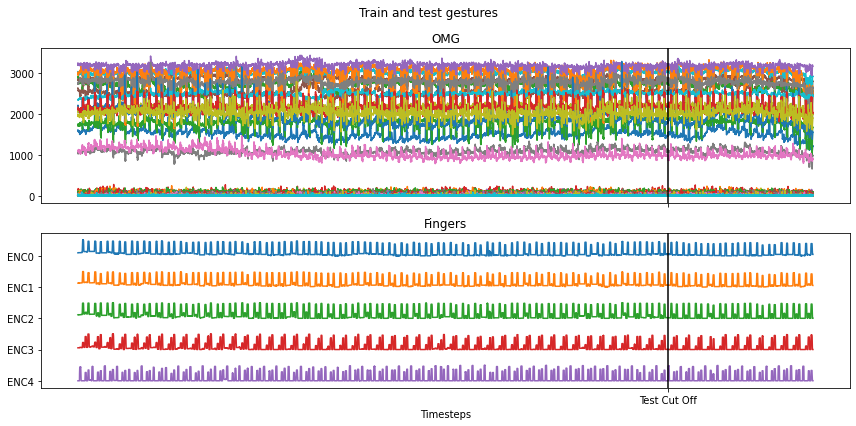

In [5]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[1])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
t,l = plt.xticks()
plt.yticks(-np.arange(len(ENC_CH)) * 200, ENC_CH)
#plt.legend()
plt.title('Fingers')
plt.xlabel('Timesteps')

plt.sca(axx[0])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[OMG_CH].values)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k') #, label='Train-Test split')
#t, l = plt.xticks()
plt.xticks( ticks=[gestures_train['ts'].values[-1]], labels=["Test Cut Off"])
plt.title('OMG')
#plt.legend()



plt.suptitle('Train and test gestures')
plt.tight_layout()

### Protocol

In [6]:
gestures_protocol = pd.read_csv('gestures_protocol.csv')
gestures_protocol.head(10)

,epoch,Thumb,Index,Middle,Ring,Pinky,id
0,0,0,0,0,0,0,1
1,1,100,0,0,0,0,2
2,2,0,0,0,0,0,3
3,3,0,0,100,100,100,4
4,4,0,0,0,0,0,5
5,5,100,100,0,0,0,6
6,6,0,0,0,0,0,7
7,7,100,100,100,100,100,8
8,8,0,0,0,0,0,9
9,9,0,0,0,0,0,1


In [7]:
gestures_train_ext = pd.merge(
    gestures_train,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

gestures_test_ext = pd.merge(
    gestures_test,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

In [8]:

gestures_train_ext.isna().sum().unique(), gestures_test_ext.isna().sum().unique()

(array([0]), array([0]))

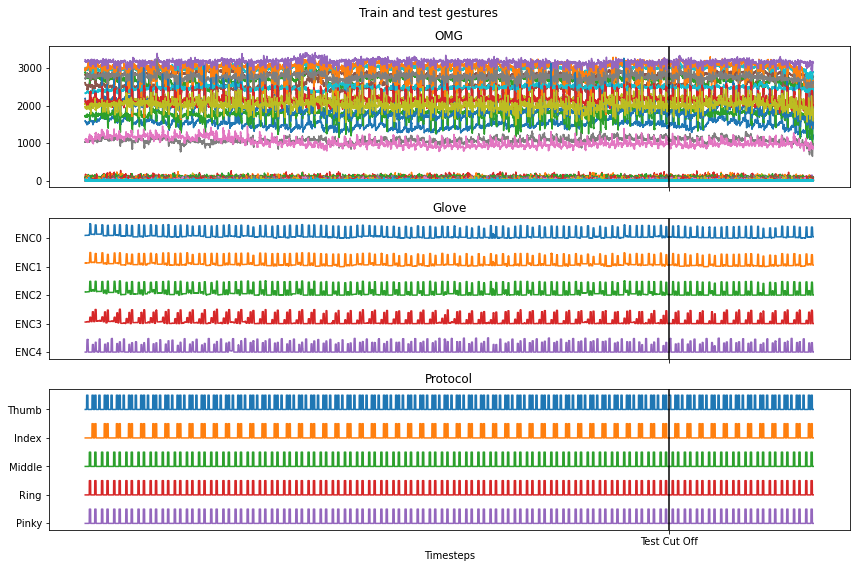

In [9]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[OMG_CH].values)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.title('OMG')

plt.sca(axx[1])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(ENC_CH)) * 200, ENC_CH)
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.title('Glove')

plt.sca(axx[2])

plot_train = plt.plot(
    gestures_train_ext['ts'].values,
    gestures_train_ext[FINGERS].values - np.arange(5) * 200
)

plot_test = plt.plot(
    gestures_test_ext['ts'].values,
    gestures_test_ext[FINGERS].values - np.arange(5) * 200
)

for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(5) * 200, FINGERS)
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.xlabel('Timesteps')
plt.xticks( ticks=[gestures_train_ext['ts'].values[-1]], labels=["Test Cut Off"])
plt.title('Protocol')

plt.suptitle('Train and test gestures')
plt.tight_layout()

# Pre-processing

Pre-processing steps:
- selecting high-level OMG channels,
- transforming the labeling of the data to solve the classification problem,
- adding a set of delayed data from OMG channels to each row. 

Post-processing steps: 
- exponential smoothing of the main class probability by Holt-Winter filter
- threshold discrimination of smoothed probability 
- conversion to regression labelling data space

### Selecting high-level OMG Sensors

In [10]:
high_ch = []
for ch in OMG_CH:
    if gestures_train[ch].min() > 500: 
        high_ch.append(ch)
print("High_ch:", high_ch, "total q-ty", len(high_ch))

High_ch: ['0', '2', '5', '8', '12', '15', '17', '19', '21', '24', '27', '29', '30', '33', '36', '38'] total q-ty 16


In [11]:
ch_to_delete = [int(x) for x in OMG_CH if x not in high_ch]
# Use x = np.delete(x,ch_to_delete) to delete useless channels


In [12]:
high_ch_num = [int(x) for x in high_ch]
print(high_ch_num)


[0, 2, 5, 8, 12, 15, 17, 19, 21, 24, 27, 29, 30, 33, 36, 38]


### Labeling Transformation

In [13]:
def shift(arr, num, fill_value=np.nan):
    """ Simple shift of numpy array"""
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result[:] = arr
    return result
 
# The OMG sensor signals lag behind the glove sensor signals by about 15 time steps. 
# Extending the range of the protocol signals to the left by 15 time steps. 
def classify_glove_sensors(source, pairs=PAIRS):
    "Conversion of glove coordinates to classes"
    nts = source.shape[0]
    chan = []
    for p in pairs: 
        nn = "C"+p[0]
        chan.append(nn) 
        cls = np.zeros((nts)).astype(int)
        sens = source[p[0]].values
        prot = np.where(source[p[1]].values>50,1,0) 
        prot2 = shift(prot,15,fill_value=0)
        mask = np.logical_or(prot,prot2)
        cls = np.where((sens>40)& mask,1,0)
        source[nn] = cls
    return source, chan

In [14]:
new_train, cls_tgt =classify_glove_sensors(gestures_train_ext)
new_test, _ = classify_glove_sensors(gestures_test_ext)

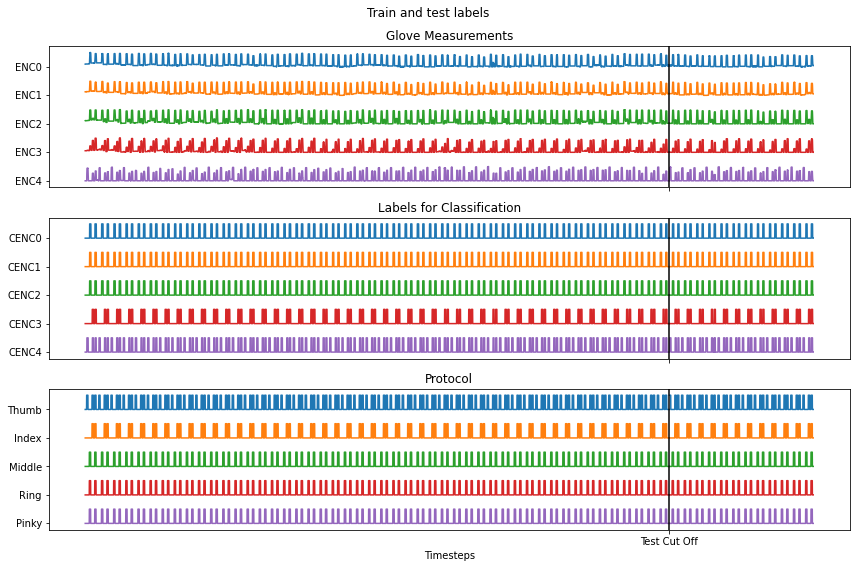

In [15]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])

plot_train = plt.plot(new_train['ts'].values, new_train[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
plot_test = plt.plot(new_test['ts'].values, new_test[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(ENC_CH)) * 200, ENC_CH)
plt.axvline(new_train['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.title('Glove Measurements')

plt.sca(axx[1])
plot_train = plt.plot(new_train['ts'].values, new_train[cls_tgt].values - np.arange(len(cls_tgt)) * 2)
plot_test = plt.plot(new_test['ts'].values, new_test[cls_tgt].values - np.arange(len(cls_tgt)) * 2)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(cls_tgt)) * 2, cls_tgt)
plt.axvline(new_train['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.title('Labels for Classification')


plt.sca(axx[2])

plot_train = plt.plot( new_train['ts'].values, new_train[FINGERS].values - np.arange(len(FINGERS)) * 200 )
plot_test = plt.plot( new_test['ts'].values, new_test[FINGERS].values - np.arange(len(FINGERS)) * 200)

for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(5) * 200, FINGERS)
plt.axvline(new_train['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.xlabel('Timesteps')
plt.xticks( ticks=[new_train['ts'].values[-1]], labels=["Test Cut Off"])
plt.title('Protocol')

plt.suptitle('Train and test labels')
plt.tight_layout()

### Artificial delaying of OMG data

In [16]:
def delay_inputs(src,inp,numstep):
    """Supplementing the raw data by delayed numstep steps."""
    delayed_ch = []
    res = np.empty((src.shape[0],len(inp)), dtype=int)
    for i in range(len(inp)): 
        ch = inp[i]
        newch = ch +"-d"+str(numstep)
        delayed_ch.append(newch)
        res[:,i] = shift(src[ch].values, numstep, fill_value=0)
    result = pd.DataFrame(res, index=src.index, columns= delayed_ch)
    return result, delayed_ch

Repeated inserting columns into the dataframe resulted in a performance error. The performance was dropping catastrophically. 
I had to create a dataframe with 16 columns in a loop and merge it with the original one. 

In [17]:
orig_delayed_ch = []
orig_delayed_ch.extend(high_ch)
for delay in range(5,51,5):
    ddf, dch = delay_inputs(new_train, high_ch, delay)
    new_train=new_train.join(ddf)
    orig_delayed_ch.extend(dch)
    ddf1, _ = delay_inputs(new_test, high_ch, delay)
    new_test=new_test.join(ddf1)
print(new_train.shape, new_train.columns)
print(new_test.shape, new_test.columns)

(33172, 237) Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '17-d50', '19-d50', '21-d50', '24-d50', '27-d50', '29-d50', '30-d50',
       '33-d50', '36-d50', '38-d50'],
      dtype='object', length=237)
(8168, 237) Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '17-d50', '19-d50', '21-d50', '24-d50', '27-d50', '29-d50', '30-d50',
       '33-d50', '36-d50', '38-d50'],
      dtype='object', length=237)


In [18]:
print(len(orig_delayed_ch))

176


In [19]:
use_row = [0]+[x for x in range(5,51,5)]
#print(use_row)


In [20]:
exclude_row = [x for x in np.arange(51) if x not in use_row]
#print(exclude_row)

In [21]:
def shift_fifo_array(array,fillvect):
    """ Simple shift array by rows and fill zero row with fillvect"""
    res = np.empty_like(array)
    res[0,:] = fillvect[:]
    res[1:,:] = array[0:-1,:]
    return res

In [22]:
def select_rows_and_flatten(array, exclude=exclude_row):
    """ deleting useless rows from buffer"""
    t = np.delete(np.copy(array),exclude, axis=0 )
    return t.flatten()

In [23]:
display = False 
if display:
    test = np.zeros((51,len(high_ch_num))).astype(int)
    for i in range(51):
        test = shift_fifo_array(test,high_ch_num)
        test[0,0] = i
    print(test[:5,:])
    print(test[-5:,:])
    inp = select_rows_and_flatten(test)
    print(inp)

# Modeling

In [24]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

models=dict()
for i in range(len(ENC_CH)):
    models[i] = LogisticRegression( solver="newton-cholesky", penalty='l2', C=1.0, random_state=19, max_iter=5000, n_jobs=-1)
    models[i].fit(new_train[orig_delayed_ch].values, new_train[cls_tgt[i]] )
  

## PostProcessing and Prediction

In [25]:
def holt_winter_smoothing(arr):
    for i in range(1,len(arr)):
        arr[i] = 0.1*arr[i]+ 0.9*arr[i-1]
    return arr

In [26]:
def predict_postprocess(src, inp, models, chan=ENC_CH):
    #res = dict()
    proba = dict()
    clsp = dict()
    fin = dict()

    for i in range(len(chan)):
        ch = chan[i]
        chan_res = dict()
        prb = models[i].predict_proba(src[inp].values)[:,1]
        smooth = holt_winter_smoothing(prb)
        cl = np.where(smooth>0.6,1,0)
        fn = 5 + 80*cl
        proba[ch] = prb
        clsp[ch] = cl
        fin[ch] = fn
    return pd.DataFrame(proba, index=src.index), pd.DataFrame(clsp, index=src.index), pd.DataFrame(fin, index=src.index)


In [27]:
train_proba, train_cls, train_pred = predict_postprocess(new_train, orig_delayed_ch, models )
test_proba, test_cls, test_pred = predict_postprocess(new_test, orig_delayed_ch, models) 

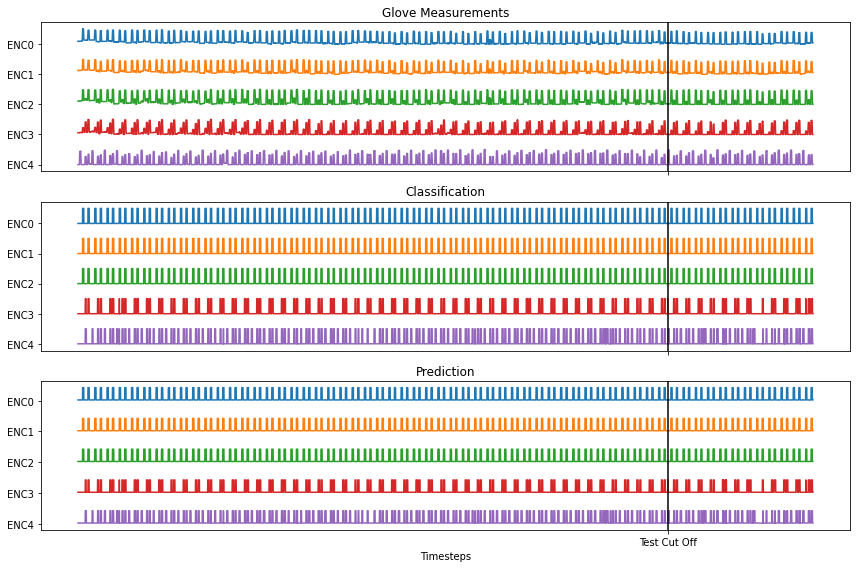

In [28]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])

plot_train = plt.plot(new_train['ts'].values, new_train[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
plot_test = plt.plot(new_test['ts'].values, new_test[ENC_CH].values - np.arange(len(ENC_CH)) * 200)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(ENC_CH)) * 200, ENC_CH)
plt.axvline(new_train['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.title('Glove Measurements')

plt.sca(axx[1])
plot_train = plt.plot(new_train['ts'].values, train_cls[ENC_CH].values - np.arange(len(ENC_CH)) * 2)
plot_test = plt.plot(new_test['ts'].values, test_cls[ENC_CH].values - np.arange(len(ENC_CH)) * 2)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(ENC_CH)) * 2, ENC_CH)
plt.axvline(new_train['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.title('Classification')


plt.sca(axx[2])
plot_train = plt.plot( new_train['ts'].values, train_pred[ENC_CH].values - np.arange(len(ENC_CH)) * 200 )
plot_test = plt.plot( new_test['ts'].values, test_pred[ENC_CH].values - np.arange(len(ENC_CH)) * 200)

for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(ENC_CH)) * 200, ENC_CH)
plt.axvline(new_train['ts'].values[-1], color='k', label='Train-Test split')
#plt.legend()
plt.xlabel('Timesteps')
plt.xticks( ticks=[new_train['ts'].values[-1]], labels=["Test Cut Off"])
plt.title('Prediction')

#plt.suptitle('Measurement, Classification and Prediction Results')
plt.tight_layout()

## Performance Evaluation

In [29]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc

def evaluate_performance(src,clsd,pred): 
    perf = {"metric":["MSE","Accuracy"]}
    for c in range(len(ENC_CH)):
        col = ENC_CH[c]
        tcol = cls_tgt[c]
        perf[col] = [round(mse(src[col].values, pred[col].values),4), 
                     round(acc(src[tcol].values, clsd[col].values),4)]
    return pd.DataFrame(perf)

In [30]:
train_perf = evaluate_performance(new_train,train_cls,train_pred)
print("Train Performance")
train_perf.head()

Train Performance


,metric,ENC0,ENC1,ENC2,ENC3,ENC4
0,MSE,185.3624,216.4699,251.0049,265.8241,389.3799
1,Accuracy,0.9632,0.9631,0.9628,0.9618,0.9323


In [31]:
test_perf = evaluate_performance(new_test,test_cls,test_pred)
print("Test Performance")
test_perf.head()

Test Performance


,metric,ENC0,ENC1,ENC2,ENC3,ENC4
0,MSE,163.3259,167.8639,232.9693,308.7760,543.0176
1,Accuracy,0.9641,0.9636,0.9636,0.9467,0.8973


# Real-time inference

In [32]:
import time
import serial
from IPython.display import clear_output

In [33]:
crc_table = [
    54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
    111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
    113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
    179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
    115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
    88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
    97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
    45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
    153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
    114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
    215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
    0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
    18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
    57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
    193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
    213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
    137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
    67, 112, 109, 78, 114, 165, 244, 183, 121
];
    
def get_crc(data, count):
    result = 0x00
    l = count
    while (count>0):   
        result = crc_table[result ^ data[l-count]]
        count -= 1;
    return result;

def drv_abs_one(ser, control):
    if ser is None:
        return
    pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
    pack[-1] = get_crc(pack[1:], 9)
    return (pack, ser.write(bytearray(pack)))

## Inference Utils: Put your code here

In [34]:
#input_HWFiltering = True
#input_alpha = 0.02
#input_alpha_sup = 1-input_alpha

def preprocessing(x, fifo):
    # x - sample vector
    # x_fifo - fifo buffer of size 51 * x channels
    x = np.delete(x,ch_to_delete)
    #if input_HWFiltering: 
    #    x = x * input_alpha + fifo[0,:]*input_alpha_sup
    t = shift_fifo_array(fifo,x)
    y = select_rows_and_flatten(t)
    return y, t

def inference(x):
    x = x.reshape(1,-1)
    y = np.zeros(len(models.keys()))
    for k in models.keys():
        y[k] = models[k].predict_proba(x)[:,1]*100
    return y

def postprocessing(x, prev):
    if prev is None:
        prev =  np.zeros(len(models.keys()))
    #smp = x
    smp = x*0.1 + prev*0.9 # Holt-Winters filter
    y = smp
    #y = np.where( smp > 60, 85,5)
    return y

def commands(x):
    y = np.where( x>60, 85, 5)
    y = np.round(np.clip(y / 100, 0, 1)*100).astype(int)
    return y

In [35]:
len(models.keys())

5

## Inference

### Offline (dataset)

In [36]:
df_sim = gestures_test.copy()
# df_sim = free_movements.iloc[:10000]
print(df_sim.shape)

(8168, 65)


In [37]:
TIMEOUT = 0.033 #*1000
DEBUG = False #True
    
i = 0

y_previous = None
x_fifo = np.zeros((51,len(high_ch_num))).astype(int)
y_dct = {
    'omg_sample':[],
    'enc_sample':[],
    'sample_preprocessed':[],
    
    'y_predicted':[],
    'y_postprocessed':[],
    'y_commands':[],
    'time_proc':[]
}

ts_old = time.time()
ts_diff = 0;

while True:    
    
    # [Data reading]
    ts_start = time.time()
    
    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed, x_fifo = preprocessing(omg_sample, x_fifo)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]
    
    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    y_dct['enc_sample'].append(enc_sample)
    y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    y_dct['y_commands'].append(y_commands)
    # [/Data logging]

    y_previous = y_postprocessed
    #y_previous = y_predicted

    if DEBUG:
        clear_output(wait=True)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
    
    ts_diff = time.time() - ts_start
    y_dct['time_proc'].append(ts_diff)
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

In [38]:
print("Total processing time:",np.sum(y_dct['time_proc']),"sec, ", np.mean(y_dct['time_proc'])*1000,"msec on average" )

Total processing time: 5.776734113693237 sec,  0.7072397298840889 msec on average


In [39]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")

omg_sample.shape = (8168, 50)
enc_sample.shape = (8168, 6)
sample_preprocessed.shape = (8168, 176)
y_predicted.shape = (8168, 5)
y_postprocessed.shape = (8168, 5)
y_commands.shape = (8168, 5)
time_proc.shape = (8168,)


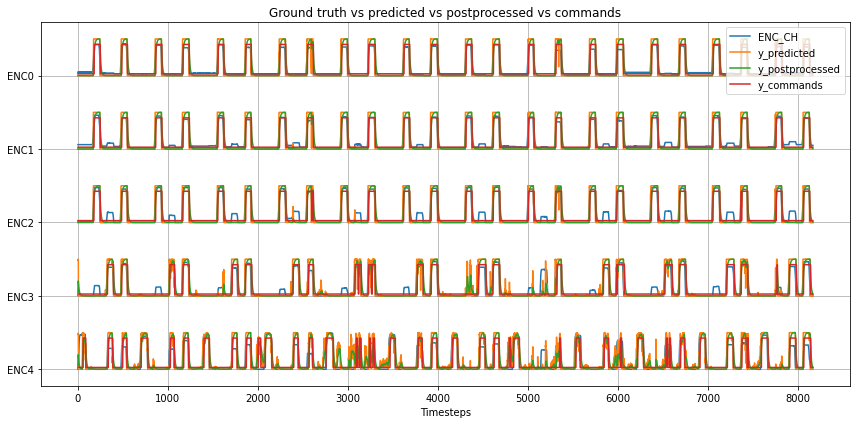

In [40]:
fig = plt.figure(figsize=(12, 6))

lines = []
labels = []

plots = plt.plot(df_sim[ENC_CH].values - np.arange(len(ENC_CH)) * 200, c='C0')
lines += [plots[0]]
labels += ['ENC_CH']

plots = plt.plot(y_dct['y_predicted'] - np.arange(len(ENC_CH)) * 200, c='C1')
lines += [plots[0]]
labels += ['y_predicted']

plots = plt.plot(y_dct['y_postprocessed'] - np.arange(len(ENC_CH)) * 200, c='C2')
lines += [plots[0]]
labels += ['y_postprocessed']

plots = plt.plot(y_dct['y_commands'] - np.arange(len(ENC_CH)) * 200, c='C3')
lines += [plots[0]]
labels += ['y_commands']

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.yticks(-np.arange(len(ENC_CH)) * 200, ENC_CH)
plt.legend(lines, labels)
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

### Online (prosthesis or virtual hand)

In [41]:
TIMEOUT = 0.033
DEBUG = True

ser = None
ser_port = None
# ser_port = '/dev/cu.usbmodem3498365F31351'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, timeout=2*TIMEOUT)
    ser.write('T1#\r\n'.encode('utf-8')) # T1 for Timestamp activate
    ser.write('M2#\r\n'.encode('utf-8')) # M2 for Mode == 2 = send samples
    ser.write('S2#\r\n'.encode('utf-8')) # SYNC to 2 for sanity check

    # flush buffers
    ser.reset_input_buffer()
    ser.read()
    
    i = 0;
    while(ser.in_waiting):
        print(f'Flushing buffers {i}: {ser.in_waiting}', end='    \r')
        ser.read_all()
        time.sleep(0.005)
        i+=1;
    ser.readline()
    ser.readline()
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
while True and ser_port is not None:    
    
    # [Data reading]
    s = ser.readline()
    ts_start = time.time()
    
    try:
        sample = np.array(s.decode('UTF-8')\
                           .replace('\r\n', "")\
                           .split(' ')
                         ).astype(int)
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    pack, _ = drv_abs_one(ser, list(y_commands)); # + [0]
    # [/Commands sending]
    
    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: iteration should increase monotonically, TIMEDIFF approximately 32-34 ms, CYCLETIME < TIMEOUT, WAITING should be == 0
        print(f'ITERATION:\t{i}\tTIMEDIFF:\t{(ts_start - ts_old)*1000: .0f}\tCYCLETIME:\t{ts_diff*1000:.0f}\tWAITING:\t{ser.in_waiting}')
        print('INPUT:\n', s)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
        print(pack)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 